In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


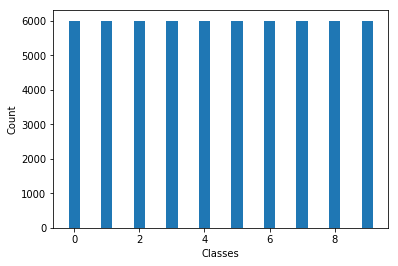

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.4987 - acc: 0.8238 - val_loss: 0.4555 - val_acc: 0.8355
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.3744 - acc: 0.8665 - val_loss: 0.3727 - val_acc: 0.8674
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step -

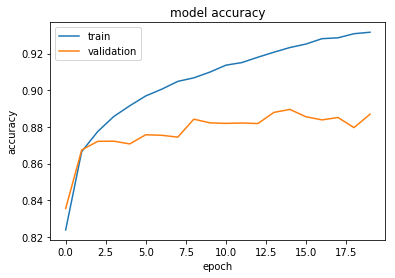

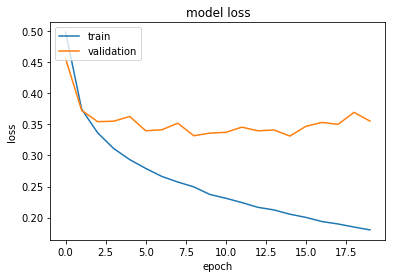

In [22]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
unique, counts = np.unique(train_labels, return_counts=True)

fig, ax = plt.subplots()
rect = ax.bar(unique, counts, 0.35)

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
plt.savefig("ttt.jpg")
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),batch_size = 32,epochs=20)
test_loss, test_acc = model.evaluate(test_images, test_labels)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("accuracy(32).jpg")
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("loss(32).jpg")
plt.show()

# print('Test accuracy:', test_acc)